# Rendu Projet Annuel 2019 - 2020

## Intervenant : Nicolas VIDAL


## Auteurs: 
- Natane BENDAVID
- Louis TARDY
- Cheikh Abdourahmane WADE


In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *
import os as os



In [3]:
print(os.getcwd())

C:\Users\void\Desktop\PA-MachineLearning-3ESGI\Project\Tests


#### Importation de librairie Rust

In [161]:
debug = True
if debug:
    my_dll_path = os.getcwd() + "/../Lib/debug/machine_learning_c.dll"
else:
    my_dll_path = os.getcwd() + "/../Lib/release/machine_learning_c.dll"
my_lib = CDLL(my_dll_path)

#### Paramétrage de la librairie

In [5]:
# Création d'un model
my_lib.create_linear_model.restype = c_void_p
my_lib.create_linear_model.argtypes = [c_int]
# Prédiction d'un model pour la classification
my_lib.predict_linear_classification.argtypes = [
    c_void_p,
    POINTER(c_double),
    c_int
]
my_lib.predict_linear_classification.restype = c_double
# Prédiction d'un model pour la régression
my_lib.predict_linear_regression.argtypes = [
    c_void_p,
    POINTER(c_double),
    c_int
]
my_lib.predict_linear_regression.restype = c_double
# Entrainement du model pour la classification
my_lib.train_linear_model_classification_python.argtypes = [
    c_void_p,
    POINTER(c_double),
    POINTER(c_double),
    c_int,
    c_int,
    c_int,
    c_double
]
my_lib.train_linear_model_classification_python.restype = None
# Entrainement du model pour la regression
my_lib.train_linear_model_regression_python.argtypes = [
    c_void_p,
    POINTER(c_double),
    POINTER(c_double),
    c_int,
    c_int
]
my_lib.train_linear_model_regression_python.restype = None
# Creation du modele PMC
my_lib.create_mlp.argtypes = [
    POINTER(c_int64),
    c_int
]
my_lib.create_mlp.restype = c_void_p
# Prediction
my_lib.mlp_classification.argtypes = [c_void_p, POINTER(c_double), c_int]
my_lib.mlp_classification.restype = c_void_p
my_lib.mlp_classification_image.argtypes = [c_void_p, POINTER(c_double), c_int]
my_lib.mlp_classification_image.restype = c_int
my_lib.mlp_classification_max_value.argtypes = [c_void_p, POINTER(c_double), c_int]
my_lib.mlp_classification_max_value.restype = c_double

my_lib.mlp_regression.argtypes = [c_void_p, POINTER(c_double), c_int]
my_lib.mlp_regression.restype = c_void_p
my_lib.mlp_regression_max_value.argtypes = [c_void_p, POINTER(c_double), c_int]
my_lib.mlp_regression_max_value.restype = c_double
# Entrainement du PMC
my_lib.mlp_train_classification.argtypes = [c_void_p,
                                            c_int,
                                            POINTER(c_double),
                                            c_int,
                                            POINTER(c_double),
                                            c_int,
                                            c_int,
                                            c_double]
my_lib.mlp_train_classification.restype = None
my_lib.mlp_train_regression.argtypes = [c_void_p,
                                            c_int,
                                            POINTER(c_double),
                                            c_int,
                                            POINTER(c_double),
                                            c_int,
                                            c_int,
                                            c_double]
my_lib.mlp_train_regression.restype = None

# Cas de tests

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [5]:
# Data MLP
X = np.array([
      [1.0, 1.0],
      [2.0, 3.0],
      [3.0, 3.0]
], dtype='float64')
Y = np.array([
      [1.0, -1.0],
      [-1.0, 1.0],
      [-1.0, 1.0],
], dtype='float64')
flattened_X = X.flatten()
flattened_Y = Y.flatten()
print(Y, flattened_Y)

[[ 1. -1.]
 [-1.  1.]
 [-1.  1.]] [ 1. -1. -1.  1. -1.  1.]


#### MLP :

0
1
1
Test model Training


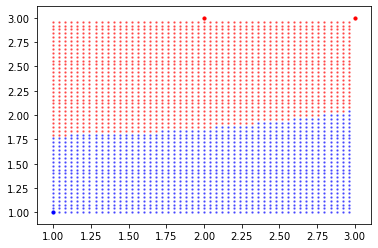

<Figure size 432x288 with 0 Axes>

In [6]:
npl = list([2, 10, 2])
npl_pointer = (c_int64 * 3)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_classification(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, 0.01)
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    predict = my_lib.mlp_classification_image(mlp, x_pointer, len(X[i]))
    print(predict)

#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    x_pointer = (c_double * len(test_points[k]))(*test_points[k])
    predict = my_lib.mlp_classification_image(mlp, x_pointer, len(test_points[k]))
    if predict == 0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
plt.scatter(X[0, 0], X[0, 1], color='blue', s=10)
plt.scatter(X[1:3, 0], X[1:3, 1], color='red', s=10)
plt.show()
plt.clf()

In [7]:
# Data
X = np.array([
      [1.0, 1.0],
      [2.0, 3.0],
      [3.0, 3.0]
], dtype='float64')
Y = np.array([
      1.0,
      -1.0,
      -1.0
], dtype='float64')
flattened_X = X.flatten()
flattened_Y = Y.flatten()

#### Simple linear model :

After Training
1.0
-1.0
-1.0
Test model Training


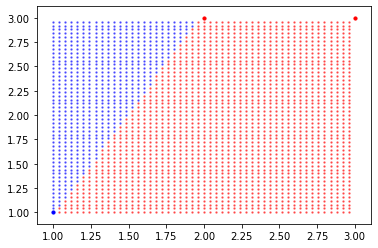

<Figure size 432x288 with 0 Axes>

In [9]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_classification_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1],
    1000,
    0.01
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_classification(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))


#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.predict_linear_classification(
                model,
                test_input_k.ctypes.data_as(POINTER(c_double)),
                len(test_input_k))
    if predicted_value == 1.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
plt.scatter(X[0, 0], X[0, 1], color='blue', s=10)
plt.scatter(X[1:3, 0], X[1:3, 1], color='red', s=10)
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [10]:
X = np.concatenate([
    np.random.random((50,2)) * 0.9 + np.array([1, 1]),
    np.random.random((50,2)) * 0.9 + np.array([2, 2])],
    axis = 0)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])
flattened_X = X.flatten()
flattened_Y = Y.flatten()

#### MLP :

Test model Training


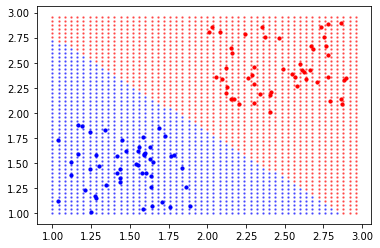

<Figure size 432x288 with 0 Axes>

In [11]:
npl = list([2, 1])
npl_pointer = (c_int64 * 2)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_classification(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, 0.01)
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    predict = my_lib.mlp_classification_image(mlp, x_pointer, len(X[i]))
#     print(predict)

#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    x_pointer = (c_double * len(test_points[k]))(*test_points[k])
    predict = my_lib.mlp_classification_max_value(mlp, x_pointer, len(test_points[k]))
    if predict > 0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', s=10)
plt.scatter(X[50:100,0], X[50:100,1], color='red', s=10)
plt.show()
plt.clf()

#### Simple linear model :

After Training
Test model Training


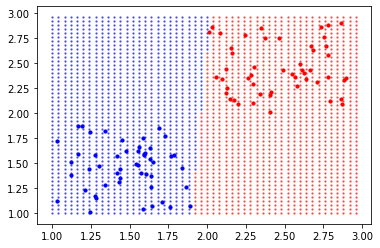

In [12]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_classification_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1],
    100000,
    0.0001
)

#Prediction du model
print("After Training")
# for inputs_k in X:
#     print(my_lib.predict_linear_classification(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))


#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.predict_linear_classification(
                model,
                test_input_k.ctypes.data_as(POINTER(c_double)),
                len(test_input_k))
    if predicted_value == 1.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', s=10)
plt.scatter(X[50:100,0], X[50:100,1], color='red', s=10)
plt.show()


### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [13]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype='float64')
Y = np.array([1, 1, -1, -1,], dtype='float64')

flattened_X = X.flatten()
flattened_Y = Y.flatten()

#### MLP

0 0.9173782069051042
0 0.9173964817566741
0 -0.9471493861489467
0 -0.8954746901108424
Test model Training
TEST POINt [[0.   0.  ]
 [0.   0.04]
 [0.   0.08]
 ...
 [1.96 1.88]
 [1.96 1.92]
 [1.96 1.96]]


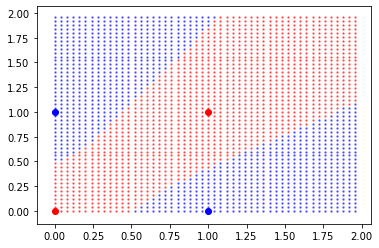

<Figure size 432x288 with 0 Axes>

In [14]:
npl = list([2, 3, 1])
npl_pointer = (c_int64 * 3)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_classification(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, 0.01)
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    my_lib.mlp_classification(mlp, x_pointer, len(X[i]))
    predict = my_lib.mlp_classification_image(mlp, x_pointer, len(X[i]))
    max_value = my_lib.mlp_classification_max_value(mlp, x_pointer, len(X[i]))
    print(predict, max_value)
    
#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0
print("TEST POINt", test_points)
test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    x_pointer = (c_double * len(test_points[k]))(*test_points[k])
    predict = my_lib.mlp_classification_max_value(mlp, x_pointer, len(test_points[k]))
    if predict > 0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

#### Simple linear model :

After Training
-1.0
1.0
-1.0
1.0
Test model Training


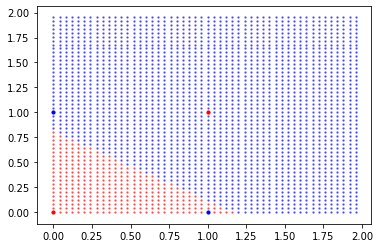

<Figure size 432x288 with 0 Axes>

In [15]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_classification_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1],
    100000,
    0.000001
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_classification(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))


#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.predict_linear_classification(
                model,
                test_input_k.ctypes.data_as(POINTER(c_double)),
                len(test_input_k))
    if predicted_value == 1.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', s=10)
plt.scatter(X[2:4,0], X[2:4,1], color='red', s=10)
plt.show()
plt.clf()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [16]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

flattened_X = X.flatten()
flattened_Y = Y.flatten()

#### MLP

Test model Training
TEST POINt [[-1.   -1.  ]
 [-1.   -0.96]
 [-1.   -0.92]
 ...
 [ 0.96  0.88]
 [ 0.96  0.92]
 [ 0.96  0.96]]


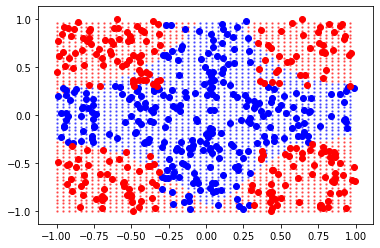

<Figure size 432x288 with 0 Axes>

In [17]:
npl = list([2, 10, 1])
npl_pointer = (c_int64 * 3)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_classification(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, 0.01)
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    my_lib.mlp_classification(mlp, x_pointer, len(X[i]))
    predict = my_lib.mlp_classification_image(mlp, x_pointer, len(X[i]))
    max_value = my_lib.mlp_classification_max_value(mlp, x_pointer, len(X[i]))
#     print(predict, max_value)
    
#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 -1
print("TEST POINt", test_points)
test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    x_pointer = (c_double * len(test_points[k]))(*test_points[k])
    predict = my_lib.mlp_classification_max_value(mlp, x_pointer, len(test_points[k]))
    if predict > 0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

#### Simple linear model :

After Training
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


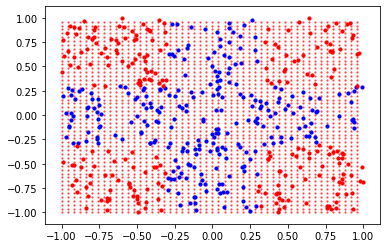

<Figure size 432x288 with 0 Axes>

In [18]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_classification_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1],
    100000,
    0.0001
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_classification(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))


#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 - 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.predict_linear_classification(
                model,
                test_input_k.ctypes.data_as(POINTER(c_double)),
                len(test_input_k))
    if predicted_value == 1.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue', s=10)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red', s=10)
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [19]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])
flattened_X = X.flatten()
flattened_Y = Y.flatten()

### MLP

Test model Training
TEST POINt [[-1.   -1.  ]
 [-1.   -0.96]
 [-1.   -0.92]
 ...
 [ 0.96  0.88]
 [ 0.96  0.92]
 [ 0.96  0.96]]


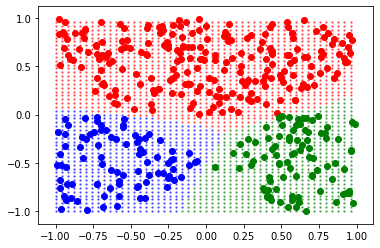

<Figure size 432x288 with 0 Axes>

In [20]:
npl = list([2, 5, 3])
npl_pointer = (c_int64 * 3)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_classification(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, 0.01)
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    my_lib.mlp_classification(mlp, x_pointer, len(X[i]))
    predict = my_lib.mlp_classification_image(mlp, x_pointer, len(X[i]))
    max_value = my_lib.mlp_classification_max_value(mlp, x_pointer, len(X[i]))
#     print(predict, max_value)
    
#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 -1
print("TEST POINt", test_points)
test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
green_points = []
for k, test_input_k in enumerate(test_points):
    x_pointer = (c_double * len(test_points[k]))(*test_points[k])
    predict = my_lib.mlp_classification_image(mlp, x_pointer, len(test_points[k]))
    if predict == 0:
        blue_points.append(test_input_k)
    elif predict == 1:
        red_points.append(test_input_k)
    else:
        green_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)
green_points = np.array(green_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [21]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

flattened_X = X.flatten()
flattened_Y = Y.flatten()

#### MLP

Test model Training
TEST POINt [[-1.   -1.  ]
 [-1.   -0.96]
 [-1.   -0.92]
 ...
 [ 0.96  0.88]
 [ 0.96  0.92]
 [ 0.96  0.96]]


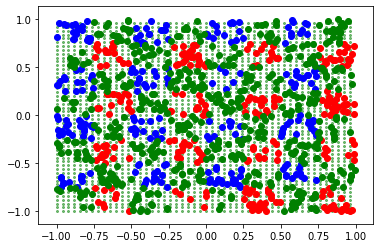

<Figure size 432x288 with 0 Axes>

In [22]:
npl = list([2, 120, 120, 3])
npl_pointer = (c_int64 * 5)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_classification(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, $.01)
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    my_lib.mlp_classification(mlp, x_pointer, len(X[i]))
    predict = my_lib.mlp_classification_image(mlp, x_pointer, len(X[i]))
    max_value = my_lib.mlp_classification_max_value(mlp, x_pointer, len(X[i]))
#     print(predict, max_value)
    
#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 -1
print("TEST POINT", test_points)
test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
green_points = []
for k, test_input_k in enumerate(test_points):
    x_pointer = (c_double * len(test_points[k]))(*test_points[k])
    predict = my_lib.mlp_classification_image(mlp, x_pointer, len(test_points[k]))
    if predict == 0:
        blue_points.append(test_input_k)
    elif predict == 1:
        red_points.append(test_input_k)
    else:
        green_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)
green_points = np.array(green_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=4)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=4)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=4)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [42]:
X = np.array([
      [1],
      [2]
], dtype='float64')
Y = np.array([
      2,
      3
], dtype='float64')
flattened_X = X.flatten()
flattened_Y = Y.flatten()

#### Simple linear model :

In [43]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_regression_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1]
)

#Prediction du model
result = []
print("After Training")
for inputs_k in X:
    result.append(my_lib.predict_linear_regression(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))
print(result)

After Training
[2.0, 3.0]


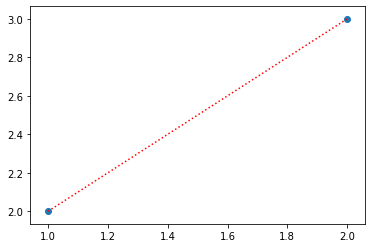

<Figure size 432x288 with 0 Axes>

In [44]:
plt.scatter(X,Y)
x = np.linspace(-10,10)
y = result[0]*x + result[1]
plt.plot(X, result, ':r')
plt.show()
plt.clf()

In [157]:
results = []
X = np.empty((0,1), dtype='float64')
Y = np.empty((0,1), dtype='float64')

for i in np.arange(1, 2.1, 0.02):
    X = np.append(X, np.array([[round(i,2)]]), axis=0)

    
for i in np.arange(2, 3.1, 0.02):
    Y = np.append(Y, np.array([[round(i,2)]]), axis=0)
    
flattened_x = X.flatten()
flattened_y = Y.flatten()

In [158]:
# Train
my_lib.train_linear_model_regression_python(
    model,
    flattened_toast.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1]
)

# Predict
for inputs_k in X:
    results.append(my_lib.predict_linear_regression(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))

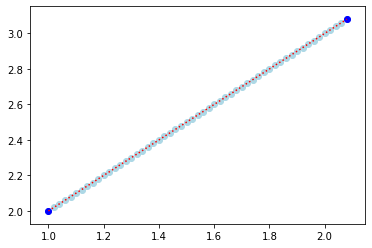

<Figure size 432x288 with 0 Axes>

In [159]:
plt.scatter(X,Y, c='lightblue')
plt.scatter(X[0],Y[0], c='blue')
plt.scatter(X[len(toast) - 1], Y[len(toast) - 1], c='blue')
x = np.linspace(-10,10)
y = results[0]*x + results[1]
plt.plot(X, results, ':r')
plt.show()
plt.clf()

### MLP


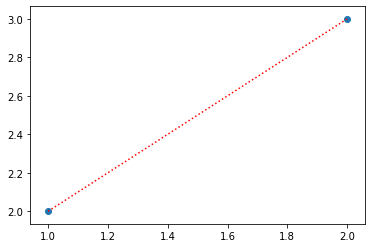

<Figure size 432x288 with 0 Axes>

In [26]:
npl = list([1, 1])
npl_pointer = (c_int64 * 2)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_regression(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, 0.01)

result = []
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    my_lib.mlp_regression(mlp, x_pointer, len(X[i]))
    max_value = my_lib.mlp_regression_max_value(mlp, x_pointer, len(X[i]))
    result.append(max_value)

plt.scatter(X,Y)
plt.plot(X, result, ':r')
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [27]:
X = np.array([
      [1],
      [2],
      [3]
], dtype='float64')
Y = np.array([
      2,
      3,
      2.5
], dtype='float64')
flattened_X = X.flatten()
flattened_Y = Y.flatten()

#### Simple linear model :

In [28]:
#### Simple linear model :#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_regression_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1]
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_regression(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))

After Training
2.250000000000001
2.500000000000001
2.750000000000001


### MLP

[2.0000062159633507, 2.9999216018057977, 2.5000133159582534]


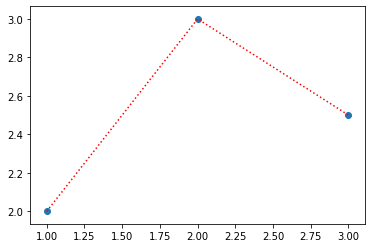

<Figure size 432x288 with 0 Axes>

In [30]:
npl = list([1, 50, 1])
npl_pointer = (c_int64 * 3)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_regression(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, 0.01)

result = []
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    my_lib.mlp_regression(mlp, x_pointer, len(X[i]))
    max_value = my_lib.mlp_regression_max_value(mlp, x_pointer, len(X[i]))
    result.append(max_value)
print(result)

plt.scatter(X,Y)
plt.plot(X, result, ':r')
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [31]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
], dtype='float64')
Y = np.array([
      2,
      3,
      2.5
], dtype='float64')
flattened_X = X.flatten()
flattened_Y = Y.flatten()

#### Simple linear model :

In [32]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_regression_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1]
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_regression(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))

After Training
1.0
3.5
4.0


### MLP

[1.9997064147878398, 3.000292266463769, 2.500043943636213]


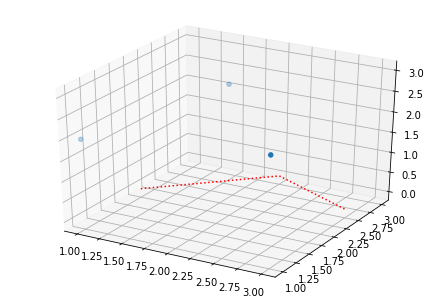

<Figure size 432x288 with 0 Axes>

In [33]:
npl = list([2, 1])
npl_pointer = (c_int64 * 2)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_regression(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, 0.01)

result = []
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    my_lib.mlp_regression(mlp, x_pointer, len(X[i]))
    max_value = my_lib.mlp_regression_max_value(mlp, x_pointer, len(X[i]))
    result.append(max_value)
print(result)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.plot(X[:,0], result, ':r')
plt.show()
plt.clf()

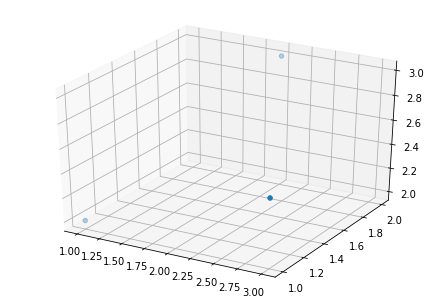

<Figure size 432x288 with 0 Axes>

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [35]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
], dtype='float64')
Y = np.array([
      1,
      2,
      3
], dtype='float64')
flattened_X = X.flatten()
flattened_Y = Y.flatten()

#### Simple linear model :

In [36]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_regression_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1]
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_regression(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))

After Training
0.0
2.0
4.0


### MLP

In [37]:
npl = list([2, 1])
npl_pointer = (c_int64 * 2)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_regression(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, 0.01)

result = []
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    my_lib.mlp_regression(mlp, x_pointer, len(X[i]))
    max_value = my_lib.mlp_regression_max_value(mlp, x_pointer, len(X[i]))
    result.append(max_value)
print(result)

[1.0000007851902453, 2.0000002755760073, 2.9999997659617694]


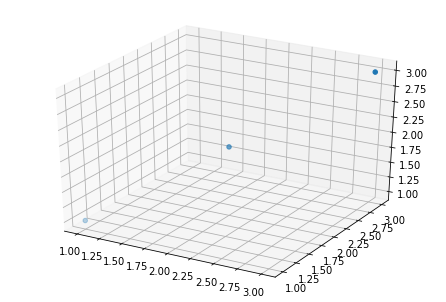

<Figure size 432x288 with 0 Axes>

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [39]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
], dtype='float64')
Y = np.array([
      2,
      1,
      -2,
      -1
], dtype='float64')
flattened_X = X.flatten()
flattened_Y = Y.flatten()

#### Simple linear model :

In [40]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_regression_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1]
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_regression(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))

After Training
-1.0
1.0
2.0
-2.0


### MLP

In [41]:
npl = list([2, 2, 1])
npl_pointer = (c_int64 * 3)(*npl)
mlp = my_lib.create_mlp(npl_pointer, len(npl))
x_train_pointer = (c_double * len(flattened_X))(*flattened_X)
y_train_pointer = (c_double * len(flattened_Y))(*flattened_Y)
# Entrainement du modele
my_lib.mlp_train_regression(mlp, len(X), x_train_pointer, len(flattened_X), y_train_pointer,
                                    len(flattened_Y), 10000, 0.01)

result = []
for i in range(len(X)):
    x_pointer = (c_double * len(X[i]))(*X[i])
    my_lib.mlp_regression(mlp, x_pointer, len(X[i]))
    max_value = my_lib.mlp_regression_max_value(mlp, x_pointer, len(X[i]))
    result.append(max_value)
print(result)

[1.9999999253830385, 0.9999998977954039, -1.9999999189919526, -0.9999999713102504]


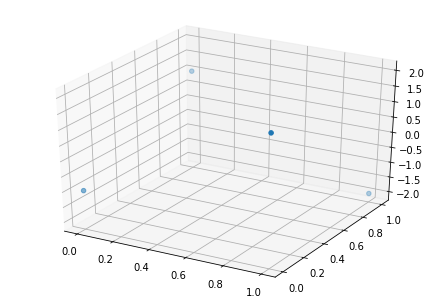

<Figure size 432x288 with 0 Axes>

In [42]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()